## Caio César Barreto Couto e Matheus Vellez Bione Botelho - 4° Período B
## Disciplina: Estatística e Probabilidade

In [10]:
import pandas as pd #Importando as bibliotecas
import numpy as np
import seaborn as sns

In [3]:
# from google.colab import drive #Importando o drive

In [4]:
# drive.mount('/content/gdrive')

In [7]:
pkmn = pd.read_csv('C:\Estatistica\\pokemons.csv')
#pkmn = pd.read_csv('/content/gdrive/My Drive/Estatistica/pokemons.csv')
pkmn.head(10)

,id,name,rank,generation,evolves_from,type1,type2,hp,atk,def,spatk,spdef,speed,total,height,weight,abilities,desc
0,1,bulbasaur,ordinary,generation-i,nothing,grass,poison,45,49,49,65,65,45,318,7,69,overgrow chlorophyll,A strange seed was planted on its back at birt...
1,2,ivysaur,ordinary,generation-i,bulbasaur,grass,poison,60,62,63,80,80,60,405,10,130,overgrow chlorophyll,"When the bulb on its back grows large, it appe..."
2,3,venusaur,ordinary,generation-i,ivysaur,grass,poison,80,82,83,100,100,80,525,20,1000,overgrow chlorophyll,The plant blooms when it is absorbing solar en...
3,4,charmander,ordinary,generation-i,nothing,fire,NaN,39,52,43,60,50,65,309,6,85,blaze solar-power,"Obviously prefers hot places. When it rains, s..."
4,5,charmeleon,ordinary,generation-i,charmander,fire,NaN,58,64,58,80,65,80,405,11,190,blaze solar-power,"When it swings its burning tail, it elevates t..."
5,6,charizard,ordinary,generation-i,charmeleon,fire,flying,78,84,78,109,85,100,534,17,905,blaze solar-power,Spits fire that is hot enough to melt boulders...
6,7,squirtle,ordinary,generation-i,nothing,water,NaN,44,48,65,50,64,43,314,5,90,torrent rain-dish,"After birth, its back swells and hardens into ..."
7,8,wartortle,ordinary,generation-i,squirtle,water,NaN,59,63,80,65,80,58,405,10,225,torrent rain-dish,Often hides in water to stalk unwary prey. For...
8,9,blastoise,ordinary,generation-i,wartortle,water,NaN,79,83,100,85,105,78,530,16,855,torrent rain-dish,A brutal POKéMON with pressurized water jets o...
9,10,caterpie,ordinary,generation-i,nothing,bug,NaN,45,30,35,20,20,45,195,3,29,shield-dust run-away,Its short feet are tipped with suction pads th...


In [8]:
pkmn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017 entries, 0 to 1016
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1017 non-null   int64 
 1   name          1017 non-null   object
 2   rank          1017 non-null   object
 3   generation    1017 non-null   object
 4   evolves_from  1017 non-null   object
 5   type1         1017 non-null   object
 6   type2         519 non-null    object
 7   hp            1017 non-null   int64 
 8   atk           1017 non-null   int64 
 9   def           1017 non-null   int64 
 10  spatk         1017 non-null   int64 
 11  spdef         1017 non-null   int64 
 12  speed         1017 non-null   int64 
 13  total         1017 non-null   int64 
 14  height        1017 non-null   int64 
 15  weight        1017 non-null   int64 
 16  abilities     1017 non-null   object
 17  desc          1017 non-null   object
dtypes: int64(10), object(8)
memory usage: 143.1+ KB


In [9]:
pkmn.describe()

,id,hp,atk,def,spatk,spdef,speed,total,height,weight
count,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000
mean,509.000000,69.965585,77.425762,72.215339,69.855457,70.054081,67.060964,426.577188,12.053097,659.910521
std,293.726914,26.598461,29.828754,29.131082,29.557427,26.662701,28.724702,112.432492,12.435152,1198.306370
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,175.000000,1.000000,1.000000
25%,255.000000,50.000000,55.000000,50.000000,46.000000,50.000000,45.000000,323.000000,5.000000,85.000000
50%,509.000000,67.000000,75.000000,70.000000,65.000000,66.000000,65.000000,450.000000,10.000000,280.000000
75%,763.000000,84.000000,100.000000,90.000000,90.000000,85.000000,88.000000,505.000000,15.000000,682.000000
max,1017.000000,255.000000,181.000000,230.000000,173.000000,230.000000,200.000000,720.000000,200.000000,9999.000000


<Axes: >

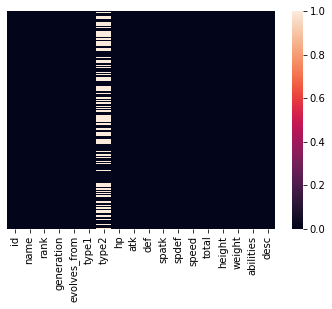

In [11]:
sns.heatmap(pkmn.isnull(), yticklabels = False)